In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-0073vilf
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-0073vilf
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.4 MB/s eta 0:00:00
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33791 sha256=2251df7e6626e7c1c1c3f7cd978cf5c3144404cd85d5fc522af4a41b82a751be
  Stored in directory: /tmp/pip-ephem-wheel-cache-9h_s1x8v/wheels/ce/d6/f1/5d00e82b3893c5f1ffee43bf7b8877148af09c7c9c6c4882c9
Successfully built segmentation-models


In [ ]:
import os
import numpy as np
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
import segmentation_models as sm
from keras.metrics import MeanIoU
from segmentation_models import Linknet
from segmentation_models import get_preprocessing
from segmentation_models.metrics import iou_score
from segmentation_models.losses import bce_jaccard_loss

Segmentation Models: using `keras` framework.


In [ ]:
# desempacotamento de imagens em formato .zip
!unzip "/content/drive/MyDrive/TCC_BICT/datasets/train.zip" -d "/content/" #train

Archive:  /content/drive/MyDrive/TCC_BICT/datasets/train.zip
   creating: /content/train/
  inflating: /content/train/100.473.jpg  
  inflating: /content/train/100.473.tif  
  inflating: /content/train/107.84.jpg  
  inflating: /content/train/107.84.tif  
  inflating: /content/train/109.973.jpg  
  inflating: /content/train/109.973.tif  
  inflating: /content/train/114.833.jpg  
  inflating: /content/train/114.833.tif  
  inflating: /content/train/119.387.jpg  
  inflating: /content/train/119.387.tif  
  inflating: /content/train/127.88.jpg  
  inflating: /content/train/127.88.tif  
  inflating: /content/train/129.532.jpg  
  inflating: /content/train/129.532.tif  
  inflating: /content/train/131.977.jpg  
  inflating: /content/train/131.977.tif  
  inflating: /content/train/134.043.jpg  
  inflating: /content/train/134.043.tif  
  inflating: /content/train/135.637.jpg  
  inflating: /content/train/135.637.tif  
  inflating: /content/train/138.338.jpg  
  inflating: /content/train/138.

In [ ]:
# desempacotamento de imagens em formato .zip
!unzip "/content/drive/MyDrive/TCC_BICT/datasets/test.zip" -d "/content/" #test

Archive:  /content/drive/MyDrive/TCC_BICT/datasets/test.zip
   creating: /content/test/
  inflating: /content/test/101.217.jpg  
  inflating: /content/test/101.217.tif  
  inflating: /content/test/104.478.jpg  
  inflating: /content/test/104.478.tif  
  inflating: /content/test/125.983.jpg  
  inflating: /content/test/125.983.tif  
  inflating: /content/test/169.007.jpg  
  inflating: /content/test/169.007.tif  
  inflating: /content/test/22.713.jpg  
  inflating: /content/test/22.713.tif  
  inflating: /content/test/33.924.jpg  
  inflating: /content/test/33.924.tif  
  inflating: /content/test/36.583.jpg  
  inflating: /content/test/36.583.tif  
  inflating: /content/test/49.17.jpg  
  inflating: /content/test/49.17.tif  
  inflating: /content/test/51.691.jpg  
  inflating: /content/test/51.691.tif  
  inflating: /content/test/58.937.jpg  
  inflating: /content/test/58.937.tif  
  inflating: /content/test/59.763.jpg  
  inflating: /content/test/59.763.tif  
  inflating: /content/test

In [ ]:
train_path = "/content/train/"
test_path = "/content/test/"

In [ ]:
def load_data(path):
    # The list to store the images
    images = []
    # The list to store the masks
    masks = []
    # Get a list of all the file names in the folder
    file_names = os.listdir(path)
    # Sort the file names in order
    file_names.sort()

    # Iterate over the sorted file names
    for file_name in file_names:
        # Check if the file is an image
        if file_name.endswith((".jpg")):
            print(file_name)
            # Read the image
            image = tf.keras.utils.load_img(os.path.join(path, file_name), color_mode = "grayscale", target_size=(256, 256))
            image = tf.keras.utils.img_to_array(image)
            image /= 255.0
            # Add the image to the list
            images.append(image)
        # Check if the file is an image
        if file_name.endswith((".tif")):
            print(file_name)
            # Read the image
            mask = tf.keras.utils.load_img(os.path.join(path, file_name), color_mode = "grayscale", target_size=(256, 256))
            mask = tf.keras.utils.img_to_array(mask)
            mask /= 255.0
            # Add the image to the list
            masks.append(mask)
    return np.array(images), np.array(masks)

In [ ]:
X_train, y_train = load_data(train_path)

100.473.jpg
100.473.tif
107.84.jpg
107.84.tif
109.973.jpg
109.973.tif
114.833.jpg
114.833.tif
119.387.jpg
119.387.tif
127.88.jpg
127.88.tif
129.532.jpg
129.532.tif
131.977.jpg
131.977.tif
134.043.jpg
134.043.tif
135.637.jpg
135.637.tif
138.338.jpg
138.338.tif
138.73.jpg
138.73.tif
144.27.jpg
144.27.tif
161.82.jpg
161.82.tif
180.049.jpg
180.049.tif
180_100.473.jpg
180_100.473.tif
180_107.84.jpg
180_107.84.tif
180_109.973.jpg
180_109.973.tif
180_114.833.jpg
180_114.833.tif
180_119.387.jpg
180_119.387.tif
180_127.88.jpg
180_127.88.tif
180_129.532.jpg
180_129.532.tif
180_131.977.jpg
180_131.977.tif
180_134.043.jpg
180_134.043.tif
180_135.637.jpg
180_135.637.tif
180_138.338.jpg
180_138.338.tif
180_138.73.jpg
180_138.73.tif
180_144.27.jpg
180_144.27.tif
180_161.82.jpg
180_161.82.tif
180_180.049.jpg
180_180.049.tif
180_190.003.jpg
180_190.003.tif
180_194.683.jpg
180_194.683.tif
180_20.623.jpg
180_20.623.tif
180_37.823.jpg
180_37.823.tif
180_38.342.jpg
180_38.342.tif
180_43.564.jpg
180_43.564.

In [ ]:
X_test, y_test = load_data(test_path)

101.217.jpg
101.217.tif
104.478.jpg
104.478.tif
125.983.jpg
125.983.tif
169.007.jpg
169.007.tif
22.713.jpg
22.713.tif
33.924.jpg
33.924.tif
36.583.jpg
36.583.tif
49.17.jpg
49.17.tif
51.691.jpg
51.691.tif
58.937.jpg
58.937.tif
59.763.jpg
59.763.tif
65.467.jpg
65.467.tif
83.822.jpg
83.822.tif
84.063.jpg
84.063.tif


In [ ]:
# Print the number of images in the list
print(f"Number of train images: {len(X_train)}")
# Print the number of masks in the list
print(f"Number of train masks: {len(y_train)}")

Number of train images: 320
Number of train masks: 320


In [ ]:
# Print the number of images in the list
print(f"Number of test images: {len(X_test)}")
# Print the number of masks in the list
print(f"Number of test masks: {len(y_test)}")

Number of test images: 14
Number of test masks: 14


In [ ]:
# Plot image and corresponding mask
def plot_images(images, masks):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(images[0][:, :, 0], cmap="gray")
    ax[0].set_title("Image")
    ax[1].imshow(masks[0][:, :, 0], cmap="gray")
    ax[1].set_title("Mask")
    plt.show()

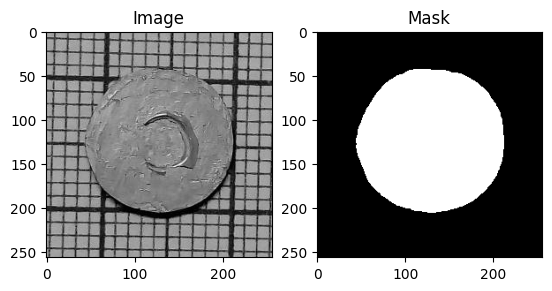

In [ ]:
plt_images = plot_images(X_train, y_train)

In [ ]:
X_train[-1].shape

(256, 256, 1)

In [ ]:
X_test[-1].shape

(256, 256, 1)

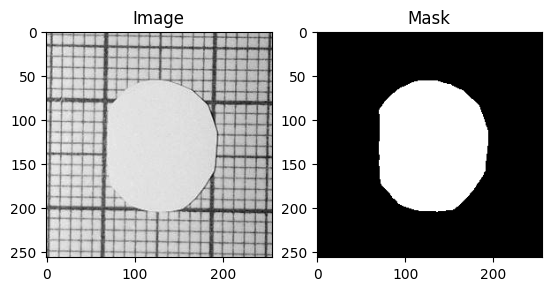

In [ ]:
plt_images = plot_images(X_test, y_test)

In [ ]:
y_train[-1].shape

(256, 256, 1)

In [ ]:
y_test[-1].shape

(256, 256, 1)

In [ ]:
# define number of channels
N = X_train.shape[-1]

# define model
model = Linknet(backbone_name='resnet34', encoder_weights=None, input_shape=(256, 256, N), classes=1, activation='sigmoid')
# see the resulting model architecture
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 256, 256, 1)  3           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 1)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 128, 128, 64  3136        ['zero_padding2d[0][0]']   

In [ ]:
LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.25, 0.25]))
focal_loss = sm.losses.BinaryFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [ ]:
start1 = datetime.now()

early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=85, mode="auto", restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early])

stop1 = datetime.now()

Epoch 1/100
10/10 [==============================] - 52s 715ms/step - loss: 0.9591 - iou_score: 0.4851 - f1-score: 0.6207 - val_loss: 10.2775 - val_iou_score: 0.2166 - val_f1-score: 0.3561
Epoch 2/100
10/10 [==============================] - 3s 334ms/step - loss: 0.8668 - iou_score: 0.8304 - f1-score: 0.9068 - val_loss: 10.2775 - val_iou_score: 0.2166 - val_f1-score: 0.3561
Epoch 3/100
10/10 [==============================] - 3s 336ms/step - loss: 0.8261 - iou_score: 0.9042 - f1-score: 0.9496 - val_loss: 10.2779 - val_iou_score: 0.2166 - val_f1-score: 0.3561
Epoch 4/100
10/10 [==============================] - 3s 336ms/step - loss: 0.8039 - iou_score: 0.9256 - f1-score: 0.9613 - val_loss: 10.2778 - val_iou_score: 0.2166 - val_f1-score: 0.3561
Epoch 5/100
10/10 [==============================] - 4s 362ms/step - loss: 0.7899 - iou_score: 0.9402 - f1-score: 0.9691 - val_loss: 10.2744 - val_iou_score: 0.2166 - val_f1-score: 0.3561
Epoch 6/100
10/10 [==============================] - 3s 349

In [ ]:
#Execution time of the model
execution_time_unet = stop1-start1
print("Unet execution time is: ", execution_time_unet)

Unet execution time is:  0:06:46.716623


In [ ]:
print(early.best_epoch)

96


In [ ]:
print(early.best)

0.7776764035224915


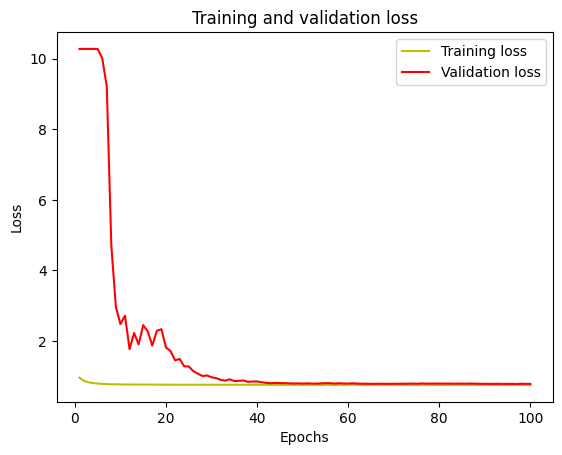

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(min(history.history['loss']))
print(min(history.history['val_loss']))

0.7514854669570923
0.7776764035224915


In [ ]:
print(max(history.history['loss']))
print(max(history.history['val_loss']))

0.9590585827827454
10.277892112731934


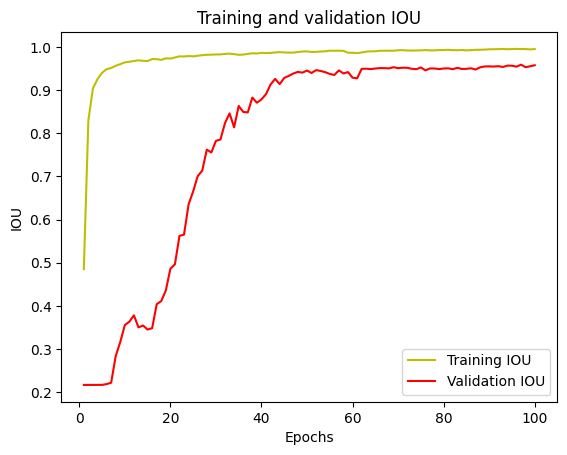

In [ ]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

In [ ]:
print(min(history.history['iou_score']))
print(min(history.history['val_iou_score']))

0.48506125807762146
0.2166028767824173


In [ ]:
print(max(history.history['iou_score']))
print(max(history.history['val_iou_score']))

0.9956387281417847
0.9591392278671265


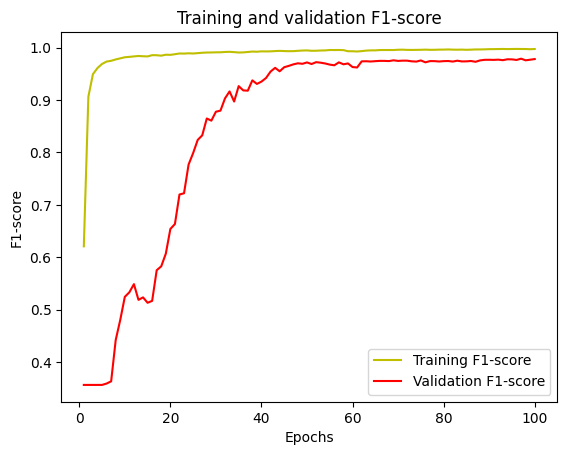

In [ ]:
acc = history.history['f1-score']
val_acc = history.history['val_f1-score']

plt.plot(epochs, acc, 'y', label='Training F1-score')
plt.plot(epochs, val_acc, 'r', label='Validation F1-score')
plt.title('Training and validation F1-score')
plt.xlabel('Epochs')
plt.ylabel('F1-score')
plt.legend()
plt.show()

In [ ]:
print(max(history.history['f1-score']))
print(max(history.history['val_f1-score']))

0.9978145360946655
0.979143500328064


In [ ]:
print(min(history.history['f1-score']))
print(min(history.history['val_f1-score']))

0.6207370758056641
0.356078177690506


In [ ]:
# Predict the mask for the input image
pred_mask = model.predict(np.expand_dims(X_test[-1], axis=0))

1/1 [==============================] - 2s 2s/step


In [ ]:
#pred_mask.reshape(256,256, 1)
pred_mask.shape

(1, 256, 256, 1)

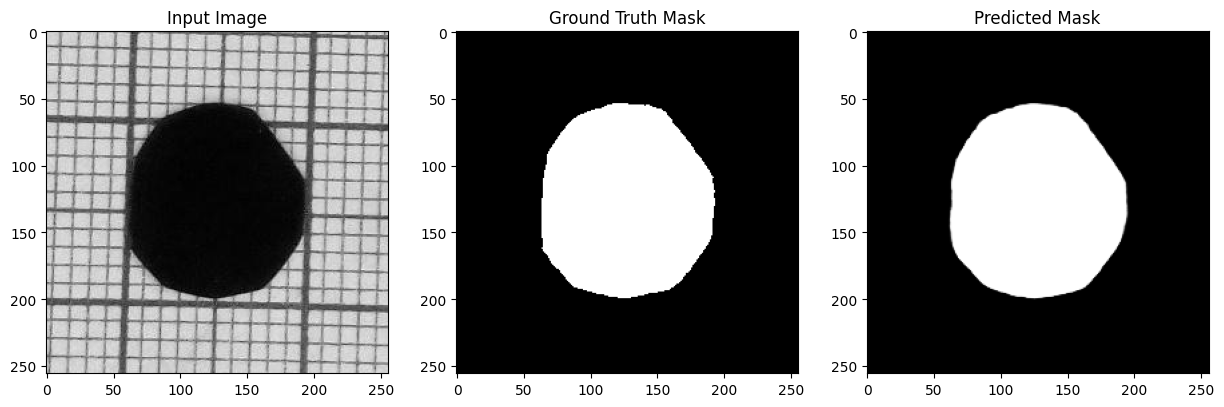

In [ ]:
# Plot the input image, ground truth mask and predicted mask

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(X_test[-1][:, :, 0], cmap="gray")
plt.title("Input Image")

plt.subplot(1, 3, 2)
plt.imshow(y_test[-1][..., 0], cmap="gray")
plt.title("Ground Truth Mask")

plt.subplot(1, 3, 3)
plt.imshow(pred_mask[0, ..., 0], cmap="gray")
plt.title("Predicted Mask")

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/TCC_BICT/model_h5/linknet_090723.h5')

In [ ]:
y_pred_unet=model.predict(X_test)
y_pred_unet_argmax=np.argmax(y_pred_unet, axis=3)

1/1 [==============================] - 0s 29ms/step


In [ ]:
#Using built in keras function
n_classes = 2

In [ ]:
IOU_unet = MeanIoU(num_classes=n_classes)
IOU_unet.update_state(y_test[:,:,:,0], y_pred_unet_argmax)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[718770.,      0.],
       [198734.,      0.]], dtype=float32)>

In [ ]:
print("Mean IoU using PSPnet =", IOU_unet.result().numpy())

Mean IoU using PSPnet = 0.39169857


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/TCC_BICT/PAC_SEGMENTATION_MEU/model_h5/unet_segment_samples_090623_diceloss_2.h5')

In [ ]:
# desempacotamento de imagens em formato .zip
!unzip "/content/drive/MyDrive/PAC_SEGMENTATION_MEU/test.zip" -d "/content/" #test

In [ ]:
test_path = "/content/test/"

In [ ]:
def load_data(path):
    # The list to store the images
    images = []
    # The list to store the masks
    masks = []
    # Get a list of all the file names in the folder
    file_names = os.listdir(path)
    # Sort the file names in order
    file_names.sort()

    # Iterate over the sorted file names
    for file_name in file_names:
        # Check if the file is an image
        if file_name.endswith((".jpg")):
            print(file_name)
            # Read the image
            image = tf.keras.utils.load_img(os.path.join(path, file_name), target_size=(256, 256), color_mode = "grayscale")
            image = tf.keras.utils.img_to_array(image)
            image /= 255.0
            # Add the image to the list
            images.append(image)
        # Check if the file is an image
        if file_name.endswith((".tif")):
            print(file_name)
            # Read the image
            mask = tf.keras.utils.load_img(os.path.join(path, file_name), target_size=(256, 256), color_mode = "grayscale")
            mask = tf.keras.utils.img_to_array(mask)
            mask /= 255.0
            # Add the image to the list
            masks.append(mask)
    return np.array(images), np.array(masks)

In [ ]:
X_test, y_test = load_data(test_path)

101.217.jpg
101.217.tif
104.478.jpg
104.478.tif
125.983.jpg
125.983.tif
169.007.jpg
169.007.tif
22.713.jpg
22.713.tif
33.924.jpg
33.924.tif
36.583.jpg
36.583.tif
49.17.jpg
49.17.tif
51.691.jpg
51.691.tif
58.937.jpg
58.937.tif
59.763.jpg
59.763.tif
65.467.jpg
65.467.tif
83.822.jpg
83.822.tif
84.063.jpg
84.063.tif


In [ ]:
# Predict the mask for the input image
pred_mask = model.predict(X_test)

1/1 [==============================] - 0s 49ms/step


In [ ]:
#pred_mask.reshape(256,256, 1)
pred_mask[-1].shape

(256, 256, 1)

In [ ]:
# Plot the input image, ground truth mask and predicted mask

for i in range(len(pred_mask)):
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i][:, :, 0], cmap="gray")
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    plt.imshow(y_test[i][..., 0], cmap="gray")
    plt.title("Ground Truth Mask")

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask[i], cmap="gray")
    plt.title("Predicted Mask")

    plt.show()

Output hidden; open in https://colab.research.google.com to view.